In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False, normalize=True, one_hot_label=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from myfunctions import *
from network import *

(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


In [2]:
net = Network()

net.add(Convolution([1,28,28],[5,5],6))
net.add(Relu())
net.add(Pooling([2,2], stride=2))
net.add(Convolution([6,12,12],[3,3],16))
net.add(Relu())
net.add(Pooling([2,2], stride=2))
net.add(Flatten())
net.add(Affine([400,100]))
net.add(Relu())
net.add(Affine([100,10]))
net.set_loss(SoftmaxWithLoss())

i=0
for layer in net.layers:
    print(i, layer.__class__.__name__)
    i+=1

0 Convolution
1 Relu
2 Pooling
3 Convolution
4 Relu
5 Pooling
6 Flatten
7 Affine
8 Relu
9 Affine


In [3]:
out = x_test
for layer in net.layers:
    out = layer.forward(out)
    print(out.shape)

(10000, 6, 24, 24)
(10000, 6, 24, 24)
(10000, 6, 12, 12)
(10000, 16, 10, 10)
(10000, 16, 10, 10)
(10000, 16, 5, 5)
(10000, 400)
(10000, 100)
(10000, 100)
(10000, 10)


In [4]:
batch_accuracy_track = []
test_accuracy_track = []

In [16]:
net.layers[0].trainable = False

train_size = x_train.shape[0]
batch_size = 1000
iter_per_epoch = train_size/batch_size
epochs = 5
iter_step = int(iter_per_epoch)
# iter_step = 10
for epoch in range(epochs):
    for i in range(iter_step):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch=x_train[batch_mask]
        y_batch=y_train[batch_mask]
        loss = net.fit(x_batch, y_batch, learning_rate=0.001)
        if i%(np.max([iter_step/100,1]))==0:
            print("== Loss {0:0.4f}, Process : {1:0.1f}% ==".format(loss, i/iter_step*100), end="\r")
    batch_accuracy = net.accuracy(x_batch, y_batch)
    test_accuracy = net.accuracy(x_test, y_test)
    batch_accuracy_track.append(batch_accuracy)
    test_accuracy_track.append(test_accuracy)
    print("== {0} Epoch, Loss {1:0.3f}, Batch Accuracy  {2:0.3f}, Test Accuracy : {3:0.3f} ==".format(epoch+1, loss, batch_accuracy, test_accuracy))


== 1 Epoch, Loss 0.059, Batch Accuracy  0.983, Test Accuracy : 0.978 ==
== 2 Epoch, Loss 0.080, Batch Accuracy  0.972, Test Accuracy : 0.979 ==
== 3 Epoch, Loss 0.063, Batch Accuracy  0.983, Test Accuracy : 0.979 ==
== 4 Epoch, Loss 0.092, Batch Accuracy  0.973, Test Accuracy : 0.979 ==
== 5 Epoch, Loss 0.063, Batch Accuracy  0.982, Test Accuracy : 0.980 ==


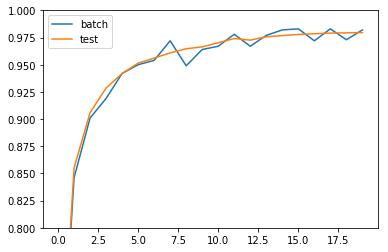

In [17]:
b_track = np.array(batch_accuracy_track)
t_track = np.array(test_accuracy_track)
x = np.arange(b_track.size)
plt.plot(x, b_track, label="batch")
plt.plot(x, t_track, label="test")
plt.ylim([0.8,1])
plt.legend(loc=2)
plt.show()

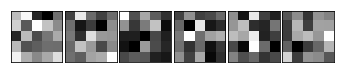

In [18]:
filter_show(net.layers[0].W)